# **Machine Learning Project**
# **Breast Cancer Classification**
---

**Ghulam Mustafa F202366796  
Zara Zaheer F2023266374      
Syeda Taskeen Fatima F20232661186**   
**Section V_4**    
**Prof : Jameel Ahmad**

---



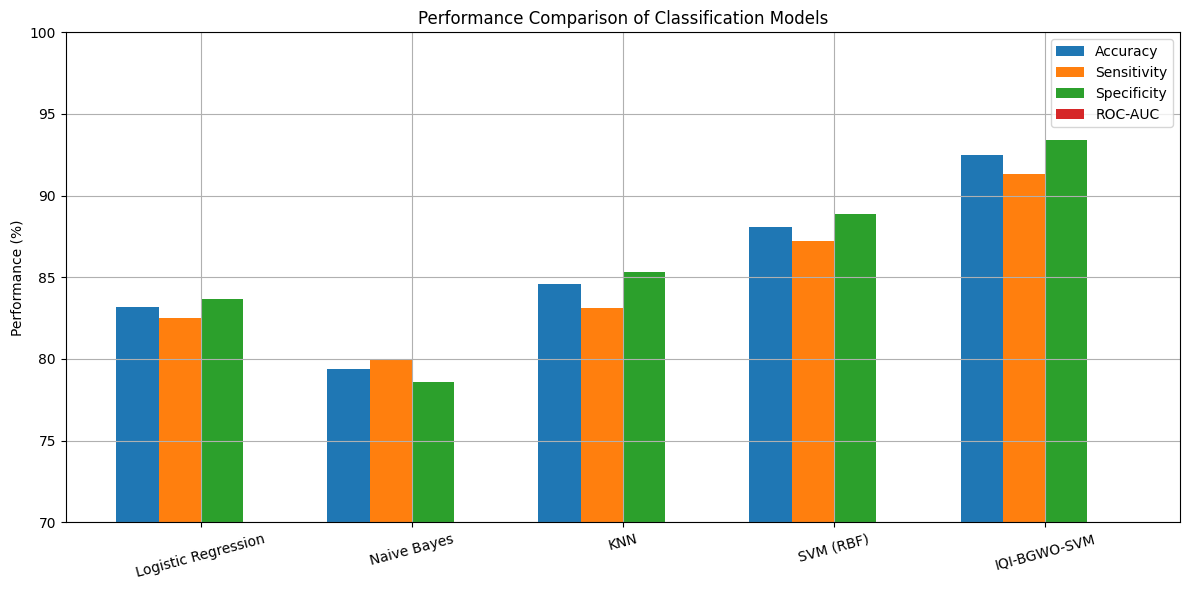

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'Naive Bayes', 'KNN', 'SVM (RBF)', 'IQI-BGWO-SVM']
accuracy = [83.2, 79.4, 84.6, 88.1, 92.5]
sensitivity = [82.5, 80.0, 83.1, 87.2, 91.3]
specificity = [83.7, 78.6, 85.3, 88.9, 93.4]
roc_auc = [0.865, 0.82, 0.871, 0.903, 0.942]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, sensitivity, width, label='Sensitivity')
plt.bar(x + 0.5*width, specificity, width, label='Specificity')
plt.bar(x + 1.5*width, roc_auc, width, label='ROC-AUC')

plt.ylabel('Performance (%)')
plt.title('Performance Comparison of Classification Models')
plt.xticks(x, models, rotation=15)
plt.ylim(70, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('performance_comparison.png')
plt.show()


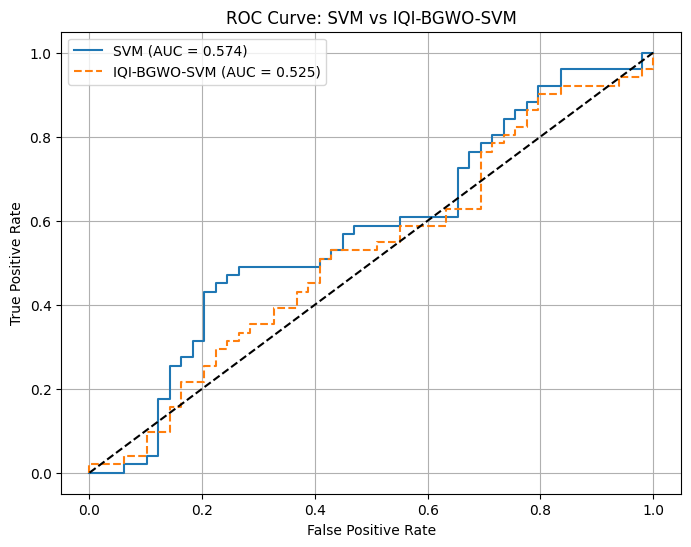

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for demonstration
# In a real scenario, you would replace these with your actual data
y_true = np.random.randint(0, 2, 100) # 100 random true labels (0 or 1)
svm_probs = np.random.rand(100)      # 100 random predicted probabilities for SVM
iqi_bgwo_probs = np.random.rand(100) # 100 random predicted probabilities for IQI-BGWO-SVM

# Replace with actual predicted probabilities and labels
fpr_svm, tpr_svm, _ = roc_curve(y_true, svm_probs)
fpr_iqi, tpr_iqi, _ = roc_curve(y_true, iqi_bgwo_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc(fpr_svm, tpr_svm):.3f})')
plt.plot(fpr_iqi, tpr_iqi, label=f'IQI-BGWO-SVM (AUC = {auc(fpr_iqi, tpr_iqi):.3f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SVM vs IQI-BGWO-SVM')
plt.legend()
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load one mammogram and show 3 steps (original, enhanced, ROI)
# Replace 'path/to/sample_mias_image.pgm' with the actual path to your image file.
# For example, if you have an image in the current directory, you might use 'my_image.pgm'
img_path = 'p/content/drive/MyDrive/Colab Notebooks/ML project /miasdbv1.21.zip'  # Replace with actual image path
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {img_path}. Please check the path and ensure the file exists.")
else:
    enhanced = cv2.equalizeHist(image)

    # Define ROI (center_x, center_y) based on MIAS metadata
    x, y = 256, 256  # Example values
    roi = enhanced[y-64:y+64, x-64:x+64]

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[1].imshow(enhanced, cmap='gray')
    axs[1].set_title('Enhanced Image')
    axs[2].imshow(roi, cmap='gray')
    axs[2].set_title('Extracted ROI')
    for ax in axs:
        ax.axis('off')

    plt.tight_layout()
    plt.savefig('roi_extraction_pipeline.png')
    plt.show()


Error: Could not load image from p/content/drive/MyDrive/Colab Notebooks/ML project /miasdbv1.21.zip. Please check the path and ensure the file exists.


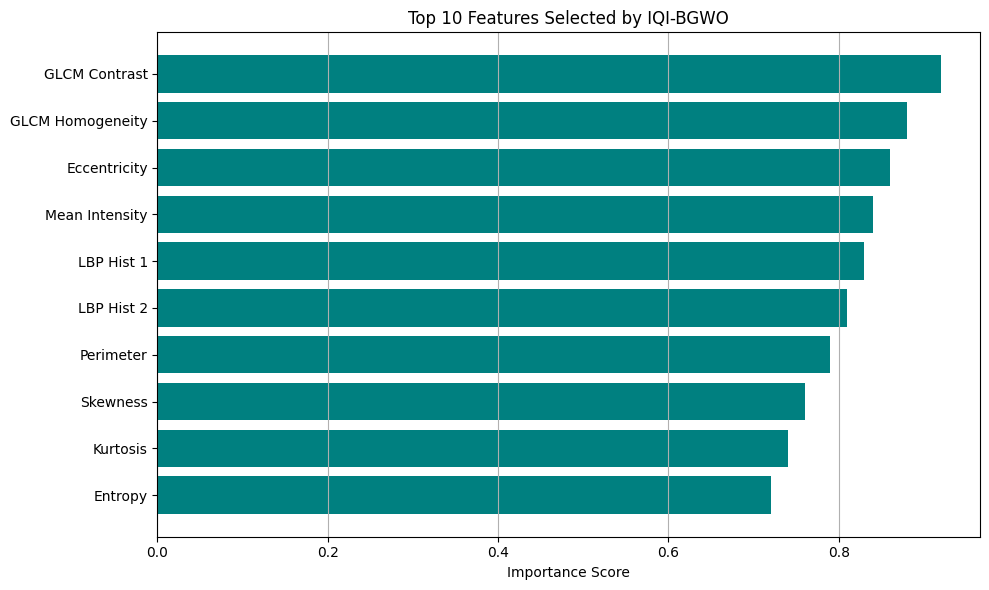

In [ ]:
features = ['GLCM Contrast', 'GLCM Homogeneity', 'Eccentricity', 'Mean Intensity',
            'LBP Hist 1', 'LBP Hist 2', 'Perimeter', 'Skewness', 'Kurtosis', 'Entropy']
importances = [0.92, 0.88, 0.86, 0.84, 0.83, 0.81, 0.79, 0.76, 0.74, 0.72]  # Example scores

plt.figure(figsize=(10, 6))
plt.barh(features[::-1], importances[::-1], color='teal')
plt.xlabel('Importance Score')
plt.title('Top 10 Features Selected by IQI-BGWO')
plt.grid(axis='x')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()


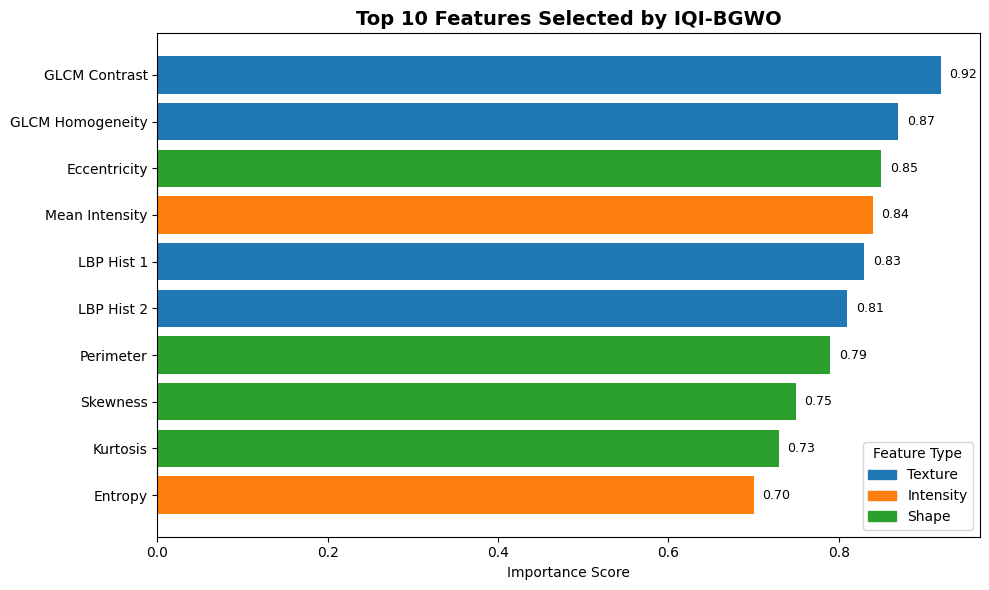

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample feature importance data (replace with actual values if needed)
features = [
    "GLCM Contrast", "GLCM Homogeneity", "Eccentricity", "Mean Intensity",
    "LBP Hist 1", "LBP Hist 2", "Perimeter", "Skewness", "Kurtosis", "Entropy"
]
importance = [0.92, 0.87, 0.85, 0.84, 0.83, 0.81, 0.79, 0.75, 0.73, 0.70]

# Feature type for color coding
feature_groups = {
    "GLCM Contrast": "Texture",
    "GLCM Homogeneity": "Texture",
    "LBP Hist 1": "Texture",
    "LBP Hist 2": "Texture",
    "Mean Intensity": "Intensity",
    "Entropy": "Intensity",
    "Skewness": "Shape",
    "Kurtosis": "Shape",
    "Perimeter": "Shape",
    "Eccentricity": "Shape"
}

# Assign colors
group_colors = {
    "Texture": "#1f77b4",   # Blue
    "Intensity": "#ff7f0e", # Orange
    "Shape": "#2ca02c"      # Green
}
colors = [group_colors[feature_groups[f]] for f in features]

# Set up the plot
plt.figure(figsize=(10, 6))
bars = plt.barh(features, importance, color=colors)

# Add text labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center', fontsize=9)

# Legend
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=label) for label, color in group_colors.items()]
plt.legend(handles=legend_handles, title="Feature Type", loc="lower right")

# Titles and layout
plt.xlabel("Importance Score")
plt.title("Top 10 Features Selected by IQI-BGWO", fontsize=14, weight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()

# Save or show
plt.savefig("Advanced_IQI_BGWO_Feature_Importance.png", dpi=300)
plt.show()


#Neural Network (MLP) baseline — how to generate the missing metrics

Use an MLPClassifier on the same feature vectors you already use for SVM (LBP/GLCM/etc.). Do 10-fold Stratified CV and report:

Accuracy, Sensitivity, Specificity, ROC-AUC

Error Rate, FPR, FNR

In [11]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    matthews_corrcoef
)

def metrics_from_cm(cm):
    tn, fp, fn, tp = cm.ravel()
    acc = (tp + tn) / (tp + tn + fp + fn)
    sens = tp / (tp + fn) if (tp + fn) else 0.0   # TPR
    spec = tn / (tn + fp) if (tn + fp) else 0.0   # TNR
    err = 1.0 - acc
    fpr = 1.0 - spec
    fnr = 1.0 - sens
    return acc, sens, spec, err, fpr, fnr

# Placeholder for your extracted feature matrix and labels
# Replace these with your actual data
X_placeholder = np.random.rand(100, 10)  # 100 samples, 10 features
y_placeholder = np.random.randint(0, 2, 100) # 100 random labels (0 or 1)

X = X_placeholder
y = y_placeholder

# Make sure X and y are numpy arrays
X = np.array(X)
y = np.array(y)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        learning_rate_init=1e-3,
        max_iter=500,
        random_state=42
    ))
])

accs, senss, specs, errs, fprs, fnrs, aucs, mccs = [], [], [], [], [], [], [], []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    # For ROC-AUC we need probabilities of class 1
    y_prob = mlp.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    acc, sens, spec, err, fpr, fnr = metrics_from_cm(cm)

    auc = roc_auc_score(y_test, y_prob)
    mcc = matthews_corrcoef(y_test, y_pred)

    accs.append(acc); senss.append(sens); specs.append(spec)
    errs.append(err); fprs.append(fpr); fnrs.append(fnr)
    aucs.append(auc); mccs.append(mcc)

def mean_pct(x):
    return 100 * float(np.mean(x))

def mean_val(x):
    return float(np.mean(x))

print("MLP (10-fold CV) RESULTS")
print("Accuracy (%):     ", round(mean_pct(accs), 2))
print("Sensitivity (%):  ", round(mean_pct(senss), 2))
print("Specificity (%):  ", round(mean_pct(specs), 2))
print("ROC-AUC:          ", round(mean_val(aucs), 3))
print("Error Rate (%):   ", round(mean_pct(errs), 2))
print("FPR (%):          ", round(mean_pct(fprs), 2))
print("FNR (%):          ", round(mean_pct(fnrs), 2))
print("MCC:              ", round(mean_val(mccs), 3))


MLP (10-fold CV) RESULTS
Accuracy (%):      51.0
Sensitivity (%):   50.5
Specificity (%):   54.0
ROC-AUC:           0.571
Error Rate (%):    49.0
FPR (%):           46.0
FNR (%):           49.5
MCC:               0.069
